<a href="https://colab.research.google.com/github/Clement-nshimiyimana/AMMI-first-week/blob/Colab/Clement_Nshimiyimana_Assignment_kmeans_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from google.colab import  drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dt =  pd.read_csv('/content/drive/MyDrive/Data.csv')

In [5]:
dt.head()

,f1,f2,f3,f4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
class Kmeans:
    def __init__(self, X, k= 3, iteration=1000):
        self.k = k
        self.iteration = iteration
        self.centroids = []
        self.clusters =[[] for i in range(self.k)]
        self.X = X

    
    def compute_distance(self, p, centroid):

        distances = np.sqrt(np.sum(p - centroid)**2)
        return distances
    
    def predict(self):

        N = len(self.X)

        idx = np.random.choice(N, self.k,replace = False )

        
        for i in idx:
            self.centroids.append(self.X[i])

        
        for iteration in range(self.iteration):

            for i,j in enumerate(self.X):
                dist = [self.compute_distance(j,point) for point in self.centroids]            
                index = np.argmin(dist)
                self.clusters[index].append(i)
                
            prev = self.centroids
            self.centroids = self.update_centroids(self.clusters)
            Labels = self.cluster_labels(self.clusters)
#         
            error = [self.compute_distance(prev[i],self.centroids[i]) for i in range(self.k)]
                
            if sum(error) == 0:
                break
                
        return Labels, self.centroids
    
    def update_centroids(self,clusters):
        
        centroids = np.zeros((self.k,self.X.shape[1]))
        
        for i, j in enumerate(clusters):
            centroid_ = np.mean(self.X[j], axis=0)
            centroids[i] = centroid_
        return centroids

        
    def cluster_labels(self, clusters):
        
        labels = np.empty(len(self.X))
        
        for cluster_idx, cluster in enumerate(clusters):
            for i in cluster:
                labels[i]=cluster_idx
        return labels
    

In [ ]:
model = Kmeans(dt.values)

In [ ]:
Clusters, centroids = model.predict()

In [ ]:
centroids

array([[6.87368421, 3.08947368, 5.71842105, 2.07105263],
       [5.00555556, 3.34444444, 1.5962963 , 0.3037037 ],
       [5.94827586, 2.76896552, 4.4862069 , 1.46206897]])

In [ ]:
Clusters

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       2., 0., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 0., 2.,
       0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 2., 2., 0., 0., 0., 0.,
       2., 0., 2., 0., 2., 0., 0., 2., 2., 0., 0., 0., 0., 0., 2., 2., 0.,
       0., 0., 2., 0., 0., 0., 2., 0., 0., 0., 2., 0., 0., 2.])

Text(0.5, 1.0, 'f1 vs f2')

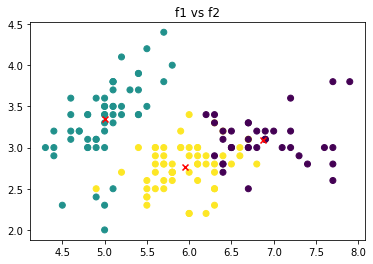

In [ ]:
plt.scatter(dt['f1'], dt['f2'], c=Clusters)
plt.scatter(centroids[:,0],centroids[:,1], marker='x',c='red')
plt.title('f1 vs f2')

Text(0.5, 1.0, 'f1 vs f3')

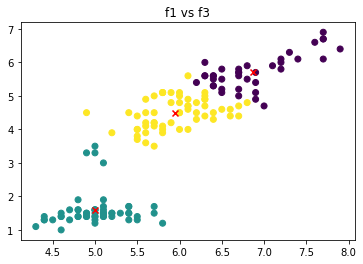

In [ ]:
plt.scatter(dt['f1'], dt['f3'], c=Clusters)
plt.scatter(centroids[:,0],centroids[:,2], marker='x',c='red')
plt.title('f1 vs f3')

Text(0.5, 1.0, 'f1 vs f4')

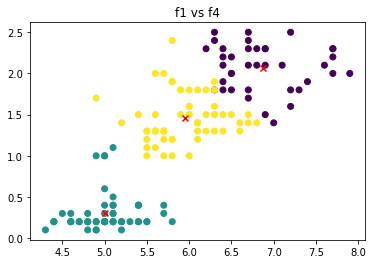

In [ ]:
plt.scatter(dt['f1'], dt['f4'], c=Clusters)
plt.scatter(centroids[:,0],centroids[:,3], marker='x',c='red')
plt.title('f1 vs f4')

In [6]:
# colors=['purple', 'blue', 'green']
# fig = plt.figure(figsize=(16,8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(dt['f1'], dt['f2'], dt['f3'],s= 50)
# ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], marker='*', s=200)

Principal components Analysis(PCA)

In [ ]:
 
class PCA:
    def __init__(self, X, num_components=2):
        
        self.num_components = num_components
        self.X = X
        
    def fit(self):
        
        centered_data = self.X  - np.mean(self.X, axis = 0)

        cov_matrix = np.cov(centered_data , rowvar = False)

        eigenvalues , eigenvectors = np.linalg.eigh(cov_matrix)

        idx = np.argsort(eigenvalues)[::-1]
        eigenvalue = eigenvalues[idx]
        eigenvector = eigenvectors[:,idx]
        
        return eigenvalue, eigenvector,centered_data

    def transform_data(self):
        eigen_values, eigen_vectors, centered_data = self.fit()
        eigenvector_ = eigen_vectors[:,0:self.num_components]

        X_reduced = np.dot(eigenvector_.T, centered_data.T).T

        return X_reduced

In [ ]:
new_data = PCA(dt)

In [ ]:
eigenvalues, eigenvectors, data = new_data.fit()

In [ ]:
Reduced_data = new_data.transform_data()

In [ ]:
dataframe = pd.DataFrame(Reduced_data , columns = ['ff1','ff2'])


Applying Kmeans to visualize the transformed data.

In [ ]:
model_new = Kmeans(Reduced_data, k=3)

In [ ]:
clusters, Centroids = model_new.predict()

In [ ]:
Centroids

array([[ 2.64241546,  0.19088505],
       [-1.32120773, -0.09544252]])

In [ ]:
clusters

array([2., 0., 2., 0., 2., 2., 2., 2., 0., 0., 2., 2., 0., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 0., 0., 0., 0., 2., 2., 0., 0., 2., 2., 2.,
       0., 2., 2., 2., 0., 2., 2., 0., 2., 0., 2., 0., 2., 0., 2., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Text(0.5, 1.0, 'Data clusters after PCA')

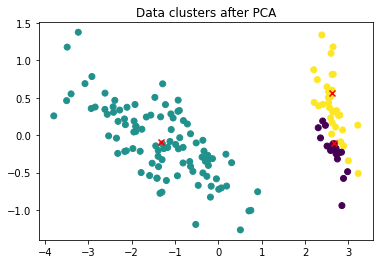

In [ ]:
plt.scatter(Reduced_data[:,0], Reduced_data[:,1], c=clusters)
plt.scatter(Centroids[:,0],Centroids[:,1], marker='x',c='red')
plt.title('Data clusters after PCA')